In [2]:
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd
import numpy as np

In [10]:
multiple = pd.read_csv('results_multiple.csv', index_col=0)
multiple

multiple2 = pd.read_csv('results.csv', index_col=0)
combined = pd.concat([multiple, multiple2])
combined.round(3)


,model,trainc1,trainc2,trainc3,trainc4,trainc5,trainc6,trainc7,trainc8,testc1,testc2,testc3,testc4,testc5,testc6,testc7,testc8
0,unetfpn,0.614,0.717,0.773,0.739,0.555,0.537,0.610,0.573,0.501,0.768,0.669,0.687,0.467,0.412,0.495,0.528
1,unetfpnsum,0.586,0.701,0.762,0.744,0.565,0.501,0.265,0.565,0.482,0.760,0.659,0.697,0.476,0.350,0.222,0.538
2,unetfpnconcat,0.597,0.794,0.721,0.723,0.537,0.744,0.524,0.525,0.445,0.748,0.607,0.670,0.421,0.715,0.448,0.534
3,fcnfpn,0.007,0.608,0.690,0.566,0.606,0.397,0.424,0.271,0.003,0.688,0.609,0.530,0.496,0.291,0.349,0.193
0,fpn,0.644,0.738,0.757,0.766,0.609,0.529,0.502,0.376,0.516,0.778,0.656,0.699,0.495,0.369,0.397,0.242
0,fcn8s,0.342,0.483,0.534,0.488,0.162,0.025,0.021,0.001,0.296,0.538,0.478,0.472,0.158,0.021,0.020,0.001
0,unet,0.559,0.693,0.713,0.708,0.529,0.473,0.446,0.220,0.421,0.699,0.589,0.633,0.397,0.337,0.335,0.140


In [23]:
combined.columns = [
    "model",
    "tnbackground",
    "tnbuilding",
    "tnroad",
    "tntree",
    "tnvegetation",
    "tnmovingcar",
    "tnstaticar",
    "tnhuman",
    "tsbackground",
    "tsbuilding",
    "tsroad",
    "tstree",
    "tsvegetation",
    "tsmovingcar",
    "tsstaticcar",
    "tshuman",
]


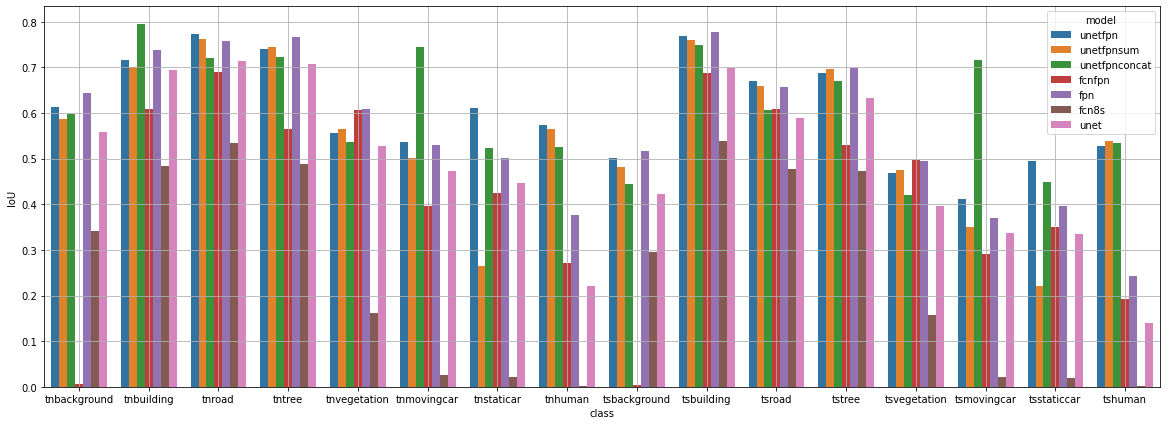

In [24]:
fg, ax = plt.subplots(figsize=(20, 7))
sb.barplot(data=combined.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [1]:
combined.iloc[:,2:10]

NameError: name 'combined' is not defined

In [12]:
combined.iloc[:,10:]

,testc2,testc3,testc4,testc5,testc6,testc7,testc8
0,0.768117,0.669278,0.687476,0.467498,0.412280,0.495491,0.527771
1,0.759707,0.658747,0.696755,0.475892,0.350031,0.221503,0.537790
2,0.748130,0.606961,0.669890,0.421214,0.715044,0.448237,0.533935
3,0.688235,0.609085,0.529553,0.496193,0.291346,0.349365,0.192907
0,0.777568,0.656031,0.699440,0.494889,0.368847,0.396739,0.241798
0,0.538397,0.477660,0.472319,0.158344,0.020946,0.019576,0.001154
0,0.698717,0.589297,0.632687,0.397078,0.337023,0.334899,0.139754


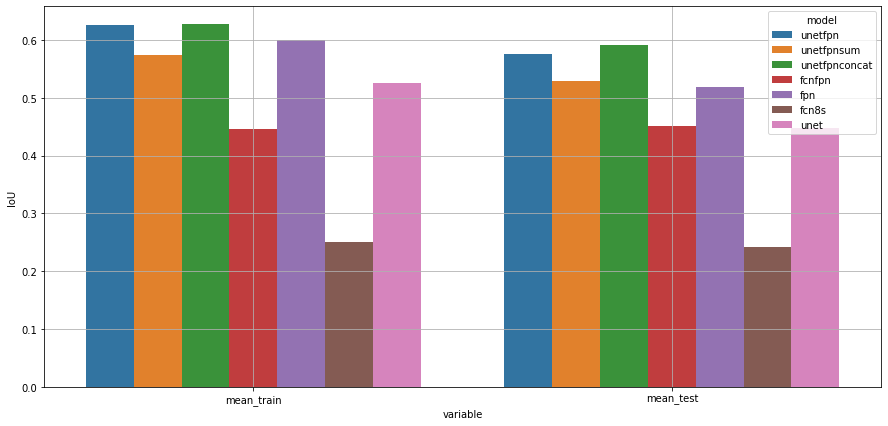

In [13]:
mean_results = combined.copy()
mean_results['mean_train'] = combined.iloc[:,2:10].mean(axis=1)
mean_results['mean_test'] = combined.iloc[:,10:].mean(axis=1)
mean_results = mean_results[['mean_train', 'mean_test', 'model']]

fg, ax = plt.subplots(figsize=(15, 7))
sb.barplot(data=mean_results.melt(id_vars='model').drop_duplicates(), y='value', x='variable', hue='model', ax=ax)
# ax.set_xlabel('class')
ax.set_ylabel('IoU')
ax.grid()

In [14]:
mean_results

,mean_train,mean_test,model
0,0.625506,0.575416,unetfpn
1,0.573125,0.528632,unetfpnsum
2,0.626631,0.591916,unetfpnconcat
3,0.445545,0.450955,fcnfpn
0,0.599085,0.519330,fpn
0,0.251274,0.241199,fcn8s
0,0.525483,0.447065,unet
